# 以CNN辨識手寫阿拉伯數字(MNIST)

In [8]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

In [9]:
# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [10]:
# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [12]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [14]:
from tensorflow.keras import layers

# 輸入的維度
input_shape = (28, 28, 1)

# 建立模型
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)


In [15]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# 訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 15s 308us/sample - loss: 0.2339 - accuracy: 0.9279 - val_loss: 0.0750 - val_accuracy: 0.9784
Epoch 2/5
48000/48000 [==============================] - 6s 121us/sample - loss: 0.0888 - accuracy: 0.9728 - val_loss: 0.0539 - val_accuracy: 0.9847
Epoch 3/5
48000/48000 [==============================] - 6s 121us/sample - loss: 0.0707 - accuracy: 0.9776 - val_loss: 0.0456 - val_accuracy: 0.9871
Epoch 4/5
48000/48000 [==============================] - 6s 122us/sample - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0413 - val_accuracy: 0.9870
Epoch 5/5
48000/48000 [==============================] - 6s 122us/sample - loss: 0.0515 - accuracy: 0.9832 - val_loss: 0.0385 - val_accuracy: 0.9876


In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

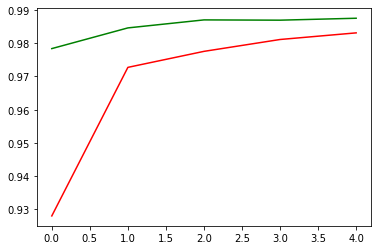

In [18]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')


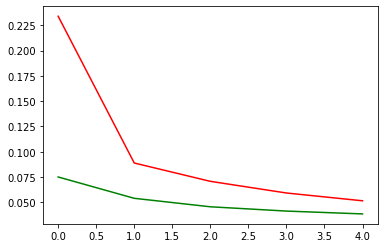

In [19]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')


In [20]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.03318313012396684, 0.9886]

In [21]:
# 實際預測 20 筆
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])


prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


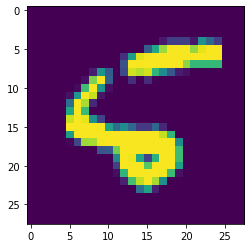

In [22]:
# 顯示錯誤的資料圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [24]:
# 使用小畫家，寫0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

uploaded_file = './myDigits/8.png'
image1 = io.imread(uploaded_file, as_gray=True)
#image1 = Image.open(uploaded_file).convert('LA')
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28, 1) #/ 255
# 反轉顏色
# 顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
X1 = np.abs(1-X1)
predictions = model.predict_classes(X1)
print(predictions)

[8]


In [25]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

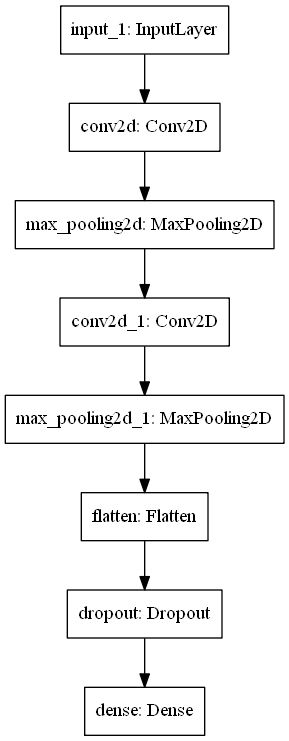

In [26]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
tf.keras.utils.plot_model(model, to_file='cnn_model.png')